<a href="https://colab.research.google.com/github/preetamjumech/autoencoder_from_scratch/blob/main/Preetam_Saha_27_09_2022_MNIST_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!wget https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt
!wget https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/test.pt

--2022-09-27 15:30:15--  https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt [following]
--2022-09-27 15:30:15--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47520431 (45M) [application/octet-stream]
Saving to: ‘training.pt.4’

training.pt.4       100%[===================

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
train, test = torch.load("training.pt"),torch.load("test.pt")

In [19]:
(x_train, y_train), (x_test,y_test) = (train, test)

In [20]:
x_train.shape

torch.Size([60000, 28, 28])

In [21]:
x_train=x_train.reshape(-1,28*28)/255.
x_test=x_test.reshape(-1,28*28)/255.

In [22]:
encoder = nn.Sequential(nn.Linear(in_features = 28*28, out_features= 256), # if im using linear activation , will be similiar to pca, we will use non-linear here
                       nn.ReLU(),
                       nn.Linear(in_features=256,out_features=128),
                       nn.ReLU(),
                       nn.Linear(in_features=128,out_features=64),
                       nn.ReLU(),
                       nn.Linear(in_features=64,out_features=16))

In [23]:
decoder = nn.Sequential(nn.Linear(in_features = 16, out_features= 64), 
                       nn.ReLU(),
                       nn.Linear(in_features=64,out_features=128),
                       nn.ReLU(),
                       nn.Linear(in_features=128,out_features=256),
                       nn.ReLU(),
                       nn.Linear(in_features=256,out_features=28*28))

In [24]:
autoencoder = nn.Sequential(encoder, decoder)

In [25]:
train_loader = DataLoader(TensorDataset(x_train.float(),y_train),
                                        batch_size=64,shuffle=True)
val_loader = DataLoader(TensorDataset(x_test.float(),y_test),
                                        batch_size=64,shuffle=True)

In [26]:
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

In [27]:
epochs=10
autoencoder = autoencoder.to(device)
opt = Adam(autoencoder.parameters())

In [30]:
def training(model,train_loader,val_loader,opt,epoch):
  training_loss = 0.0
  val_loss = 0.0

#training portion
  for batch, _ in train_loader: #not building any classification model, so input = ouput
    batch = batch.to(device)
    target = batch.to(device)

    opt.zero_grad()
    train_output = model(batch)
    train_loss = F.mse_loss(train_output,target)
    train_loss.backward()
    opt.step()
    training_loss += train_loss.item()

  if (epoch+1) %  2 ==0:
    print(f"Train loss: {training_loss}")

#validation part
  with torch.no_grad():
    for val_batch, _ in val_loader:
      val_batch = val_batch.to(device)
      val_target = val_batch.to(device)
      
      val_output = model(val_batch)
      loss_val = F.mse_loss(val_output,val_target)
      val_loss += loss_val.item()

  
  if (epoch+1) %  2 ==0:
    print(f"Train loss: {training_loss} and Val loss: {val_loss}")

  return (training_loss, val_loss)

In [31]:
losses = []
for epoch in range(epochs):
  losses.append(training(autoencoder,train_loader=train_loader, val_loader=val_loader,
                      opt=opt,epoch=epoch))

Train loss: 23.14188232459128
Train loss: 23.14188232459128 and Val loss: 3.4236764945089817
Train loss: 17.815302472561598
Train loss: 17.815302472561598 and Val loss: 2.83911619707942
Train loss: 15.927962688729167
Train loss: 15.927962688729167 and Val loss: 2.575563413091004
Train loss: 14.657351191155612
Train loss: 14.657351191155612 and Val loss: 2.3960998291149735
Train loss: 13.707651874050498
Train loss: 13.707651874050498 and Val loss: 2.249149705283344


In [32]:
idx = 20
img_arbit = x_test[idx]

In [33]:
img_arbit.shape

torch.Size([784])

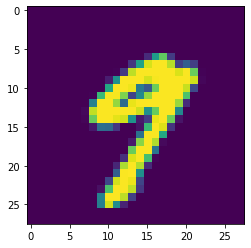

In [34]:
plt.imshow(img_arbit.numpy().reshape(28,28))

In [35]:
#here also kind of embeeding not exactly like text
input_data = img_arbit.reshape(1,-1).float().to(device)
input_data.shape

torch.Size([1, 784])

In [ ]:
input_data

In [36]:
output_encoder = encoder(input_data)
output_encoder

tensor([[-1.3092,  2.1636, -0.1991,  1.2473, -1.6391, -0.3032,  2.1018,  1.3782,
          0.6327, -0.7808,  0.3310, -2.2270, -0.6108, -0.2314,  1.4148,  0.6826]],
       grad_fn=<AddmmBackward0>)

In [38]:
output_decoder=decoder(output_encoder).detach().cpu().numpy().reshape(28,28)

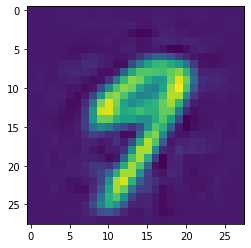

In [39]:
plt.imshow(output_decoder)